In [3]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

Dataset/Dataframe Load


In [4]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter Serbia Data Analyst Jobs


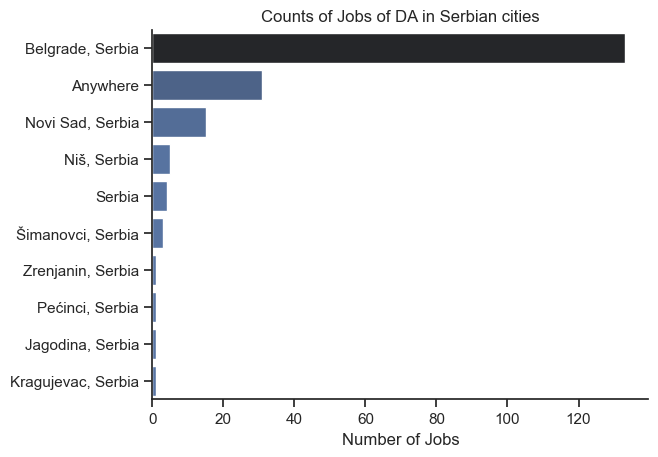

In [27]:
df_DA_Serbia = df[(df['job_country'] == 'Serbia') & (df['job_title_short'] == 'Data Analyst')]
df_plot = df_DA_Serbia['job_location'].value_counts().to_frame().head(10)
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette="dark:b_r", legend=False)
sns.despine()
plt.title('Counts of Jobs of DA in Serbian cities')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


True/False Pie Charts


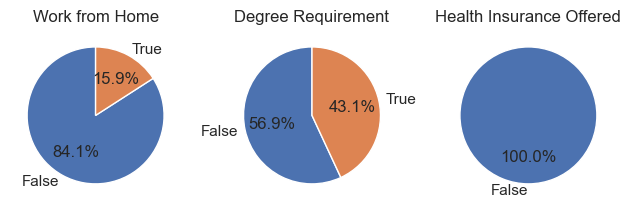

In [61]:

df_job_work_home_plot = df_DA_Serbia['job_work_from_home'].value_counts()
df_job_work_home_plot = df_job_work_home_plot.to_frame()

df_degree_plot = df_DA_Serbia['job_no_degree_mention'].value_counts()
df_degree_plot = df_degree_plot.to_frame()

df_health_plot = df_DA_Serbia['job_health_insurance'].value_counts()
df_health_plot = df_health_plot.to_frame()


fig, ax = plt.subplots(1, 3)

ax[0].pie(data=df_job_work_home_plot, x='count', labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
ax[1].pie(data=df_degree_plot, x='count', labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
ax[2].pie(data=df_health_plot, x='count', labels=['False'], autopct='%1.1f%%', startangle=90)

ax[0].set_title('Work from Home')
ax[1].set_title('Degree Requirement')
ax[2].set_title('Health Insurance Offered')
fig.tight_layout()
plt.show()

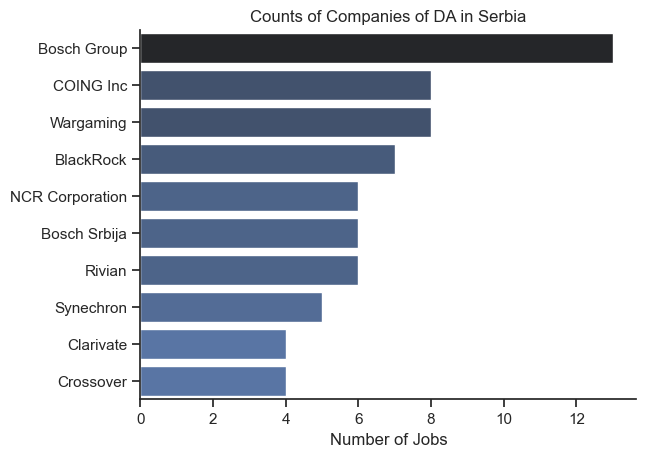

In [63]:
df_plot = df_DA_Serbia['company_name'].value_counts().to_frame().head(10)
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette="dark:b_r", legend=False)
sns.despine()
plt.title('Counts of Companies of DA in Serbia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()